<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROGRAM 2:**

Develop a program to Compute the correlation matrix to understand the relationships between pairs of features. Visualize the correlation matrix using a heatmap to know which variables have strong positive/negative correlations. Create a pair plot to visualize pairwise relationships between features. Use California Housing dataset.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset from local path (make sure housing.csv is uploaded to /content/)
data = pd.read_csv("/content/housing.csv")

# Handle infinite and NaN values
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
data.dropna(inplace=True)

# Compute correlation matrix
co_mtx = data.corr(numeric_only=True)
print(co_mtx)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

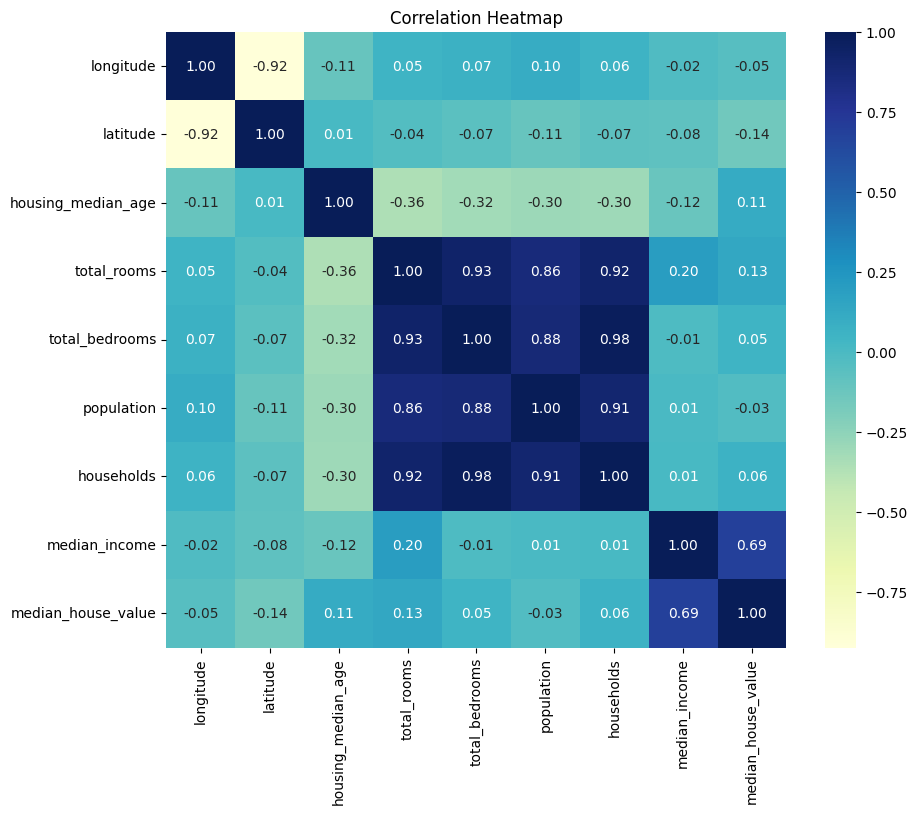

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Display first few rows
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


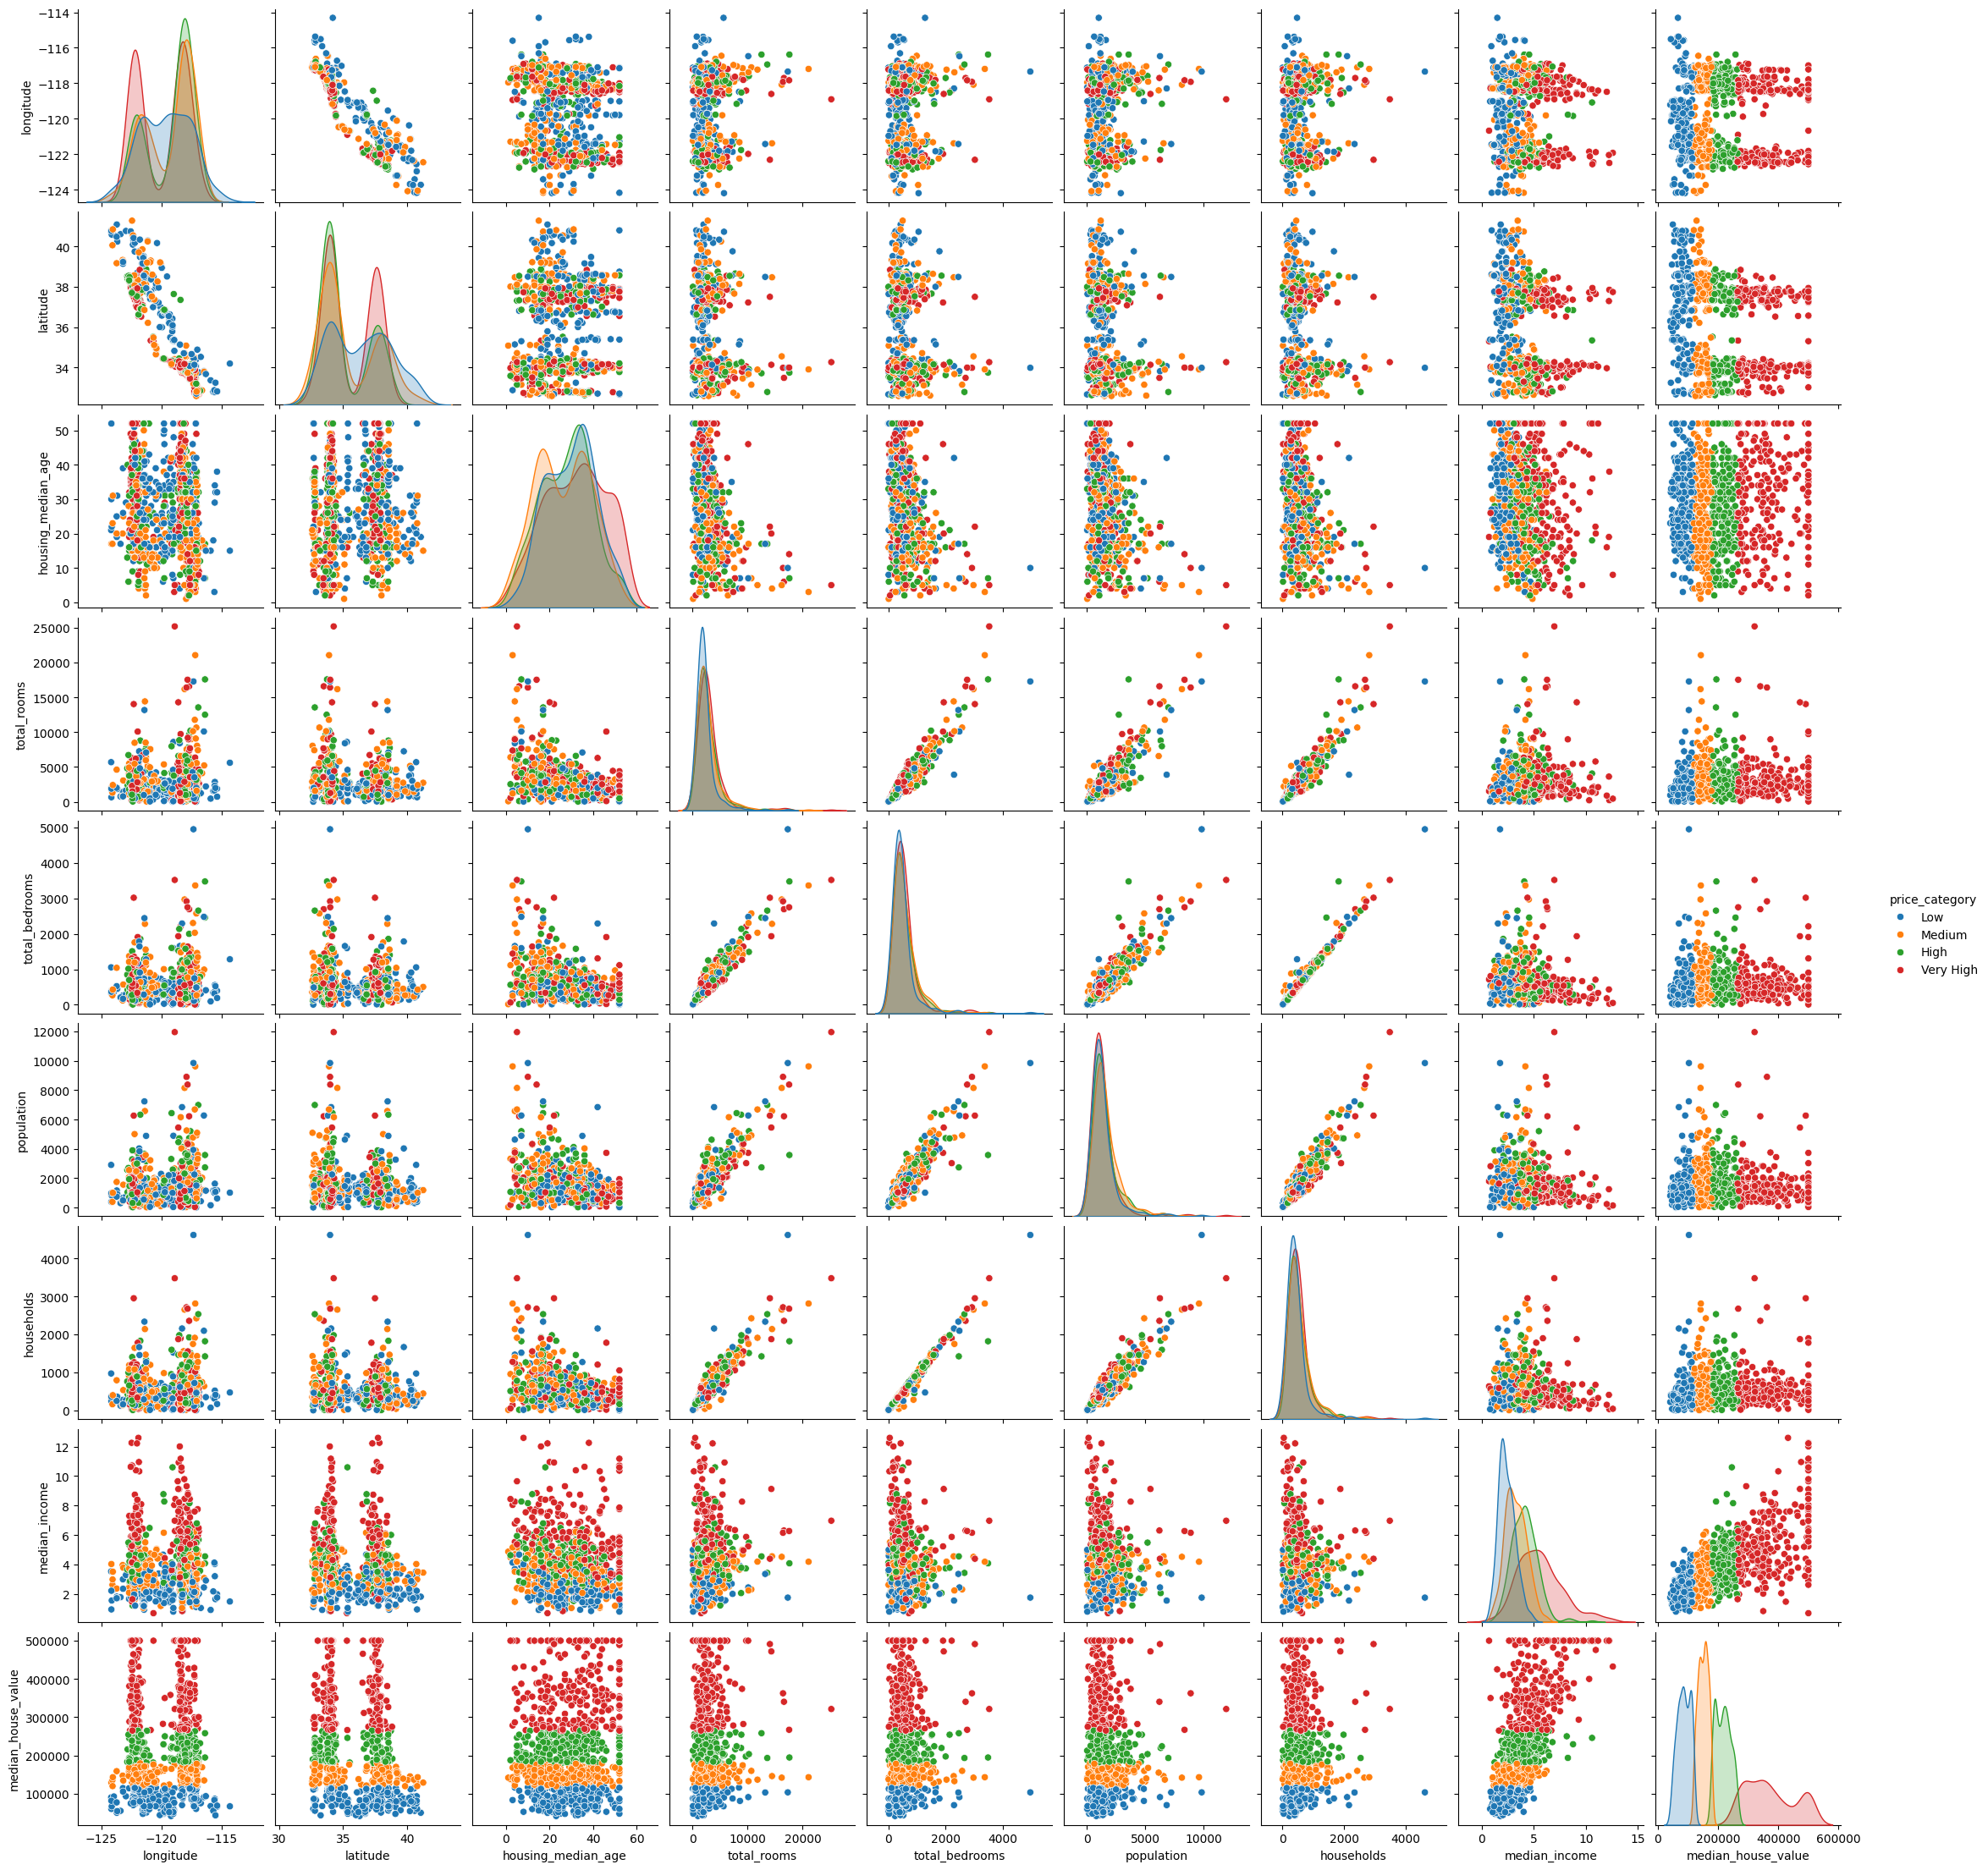

In [16]:
# Create price categories for pairplot hue
data["price_category"] = pd.qcut(data["median_house_value"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Select numeric columns plus 'price_category' for plotting
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
if "price_category" not in numeric_cols:
    numeric_cols.append("price_category")

# To avoid long runtime, take a random sample of 1000 rows for pairplot
sample_data = data.sample(n=1000, random_state=42)

# Create pair plot on sampled data
sns.pairplot(sample_data[numeric_cols], hue="price_category")
plt.show()